## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Task 1: XOR

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 0)_, ground truth _(g1, g2) = (1, 0), h0 = 0, (wx, wh, b1, w, b2) = (2, 1, 1, 2, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

**_Feedforward_**:
<br> $\phi() = sigmoid$
<br> $h_1 = \phi(w_xx_1 + w_hh_0 + b_1) = \phi(2*(-1) +1*0 +1) = 0.27$ 
<br>$h_2 = \phi(w_xx_2 + w_hh_1 + b_1) = \phi(2*(0) +1*0.27 +1) = 0.57$
<br>$y_1 = \phi(w_hh_1 + b_2) = \phi(1*(0.27)+1) = 0.57$
<br>$y_2 = \phi(w_hh_2 + b_2) = \phi(1*(0.57)+1) = 0.64$

**_Backpropagation_**:
$$dw = g_1\frac{\partial y_1}{\partial w}+ g_2\frac{\partial y_2}{\partial w} = g_1 \phi_2(h_1)(1-\phi_2(h_1)) h_1+g_2 \phi_2(h_2)(1-\phi_2(h_2)) h_2 = 0.04$$$$db_2 = g_1\frac{\partial y_1}{\partial b_2}+ g_2\frac{\partial y_2}{\partial b_2} = g_1 \phi_2(h_1)(1-\phi_2(h_1))+g_2 \phi_2(h_2)(1-\phi_2(h_2)) = 0.04$$$db_1 = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial b_1}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial b_1} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1)) = 0.015$
$dw_x = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_x}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_x} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))x_1+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1))x_2 = 0.006$
$dw_h = g_1\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_h}+ g_2\frac{\partial y_2}{\partial h_2}\frac{\partial h_2}{\partial w_h} = g_1\phi_2(h_1)(1-\phi_2(h_1))w\phi_1(x_1,h_0)(1-\phi_1(x_1,h_0))h_0+g_2 \phi_2(h_2)(1-\phi_2(h_2))w\phi_1(x_2,h_1)(1-\phi_1(x_2,h_1))h_1 = 0.006$

In [2]:
# use tensorflow to verify the answer.
w = tf.Variable(2.0)
b2 = tf.Variable(1.0)
wx = tf.Variable(2.0)
wh = tf.Variable(1.0)
b1 = tf.Variable(1.0)

h0 = tf.Variable(0.0)
x = tf.placeholder(tf.float32, shape=(2,))
g = tf.placeholder(tf.float32, shape=(2,))

y = []
h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
y.append(tf.sigmoid(w*h1 + b2))
h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
y.append(tf.sigmoid(w*h2 + b2))

loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

dw, db2, dwx, dwh, db1 = tf.gradients(loss, [w, b2, wx, wh, b1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_t, db2_t, dwx_t, dwh_t, db1_t = sess.run([dw, db2, dwx, dwh, db1],
                                              feed_dict={x: np.asarray([-1.0,0.0]), g: np.asarray([1.0,0.0])})
print("verify by tensorflow")
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

Instructions for updating:
Colocations handled automatically by placer.
verify by tensorflow
dw = 0.0413, db2 = 0.0360, dwx = 0.0060, dwh = 0.0057, db1 = 0.0152


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [3]:
from utils.xor.dataset import create_dataset

### (Demo) Build a network using a Tensorlow LSTMCell and GRUCell
This section shows an example how to build a RNN network using an LSTM cell or GRU cell. Both LSTM and GRU cell are inbuilt classes in tensorflow which separately implement the real behavior of the LSTM and GRU neuron. 

Reference: 
1. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/LSTMCell)
1. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

#### LSTM

In [17]:
from tensorflow.contrib.rnn import LSTMCell

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

#### GRU

In [5]:
from tensorflow.contrib.rnn import GRUCell

# define GRU cell
gru_units = 64
cell = GRUCell(gru_units)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


### Training 

<span style='color:red'>TODO:</span> 
1. Build your training function for RNN (choose either LSTM or GRU); 
2. Plot the cost during the training

In [18]:
# TODO: training
X_train,y_train = create_dataset(100000,10)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_rnn = []
    for i in range(100):
        _,accur,los = sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                             output_data: y_train})
        loss_rnn.append(los)   
        if i%10==0:
            print("Epoch: {} , Loss: {} , Training Accuracy : {}%".format(i,loss_rnn[i],accur*100))
sess.close()

Epoch: 0 , Loss: 0.6942346692085266 , Training Accuracy : 49.94109869003296%
Epoch: 10 , Loss: 0.6917307376861572 , Training Accuracy : 49.43409860134125%
Epoch: 20 , Loss: 0.555060088634491 , Training Accuracy : 79.59169745445251%
Epoch: 30 , Loss: 0.09177831560373306 , Training Accuracy : 99.23819899559021%
Epoch: 40 , Loss: 0.20697732269763947 , Training Accuracy : 92.59830117225647%
Epoch: 50 , Loss: 0.0151767423376441 , Training Accuracy : 100.0%
Epoch: 60 , Loss: 0.00783959124237299 , Training Accuracy : 99.9616026878357%
Epoch: 70 , Loss: 0.0006681149825453758 , Training Accuracy : 100.0%
Epoch: 80 , Loss: 0.0002454084751661867 , Training Accuracy : 100.0%
Epoch: 90 , Loss: 0.0001814726711018011 , Training Accuracy : 100.0%


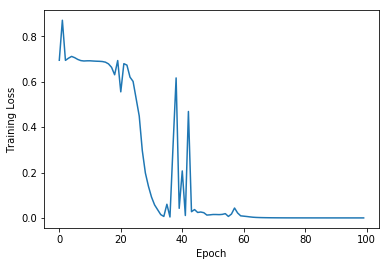

In [19]:
# TODO: plot loss history
plt.plot(loss_rnn)
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in utils/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [12]:
from utils.xor.rnn import MyLSTMCell

In [13]:
# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)


# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [15]:
# TODO: training
X_train,y_train = create_dataset(100000,10)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_rnn = []
    for i in range(100):
        _,accur,los = sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                             output_data: y_train})
        loss_rnn.append(los)   
        if i%10==0:
            print("Epoch: {} , Loss: {} , Training Accuracy : {}%".format(i,loss_rnn[i],accur*100))
sess.close()

Epoch: 0 , Loss: 0.6973105072975159 , Training Accuracy : 50.02419948577881%
Epoch: 10 , Loss: 0.6880084276199341 , Training Accuracy : 56.51500225067139%
Epoch: 20 , Loss: 0.6906903982162476 , Training Accuracy : 54.9809992313385%
Epoch: 30 , Loss: 0.656782865524292 , Training Accuracy : 59.98520255088806%
Epoch: 40 , Loss: 0.3362416923046112 , Training Accuracy : 89.32949900627136%
Epoch: 50 , Loss: 0.019100327044725418 , Training Accuracy : 99.72400069236755%
Epoch: 60 , Loss: 0.0041108583100140095 , Training Accuracy : 100.0%
Epoch: 70 , Loss: 0.0020727526862174273 , Training Accuracy : 100.0%
Epoch: 80 , Loss: 0.0008101047133095562 , Training Accuracy : 100.0%
Epoch: 90 , Loss: 0.0004949660506099463 , Training Accuracy : 100.0%


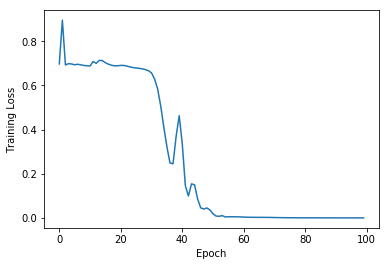

In [16]:
# TODO: plot loss history
plt.plot(loss_rnn)
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.show()